<a href="https://colab.research.google.com/github/hatoonGH/AI342lap1/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Digital Imaging Fundamentals with Python**
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS

---
## **Learning Objectives**
* Relate human visual system properties to digital image perception.
* Demonstrate brightness adaptation and contrast effects.
* Simulate sampling and quantisation.
* Work with pixel neighbourhoods and distance measures.
* Apply basic geometric transformations.

## **1. Human Visual Perception: Mach Bands**
**Exercise 1.1:** Simulating Mach bands to show how our eyes perceive transitions.

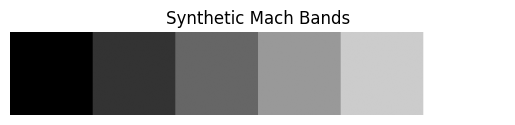

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Create Mach Bands
bands = np.zeros((100, 600))
for i in range(6):
    bands[:, i*100 : (i+1)*100] = i*40

plt.imshow(bands, cmap='gray')
plt.title("Synthetic Mach Bands")
plt.axis('off')
plt.show()

##1.Do the boundaries between bands appear sharper than the interiors?
Yes, it appears sharper between bands then the interiors.

##2. Are these sharp transitions present in the data or only in perception?
only in perception, This is a result of the way the human eye perceives contrast between adjacent areas.

## **2. Simultaneous Contrast**
**Exercise 2.1:** Perceived brightness depends on the background.

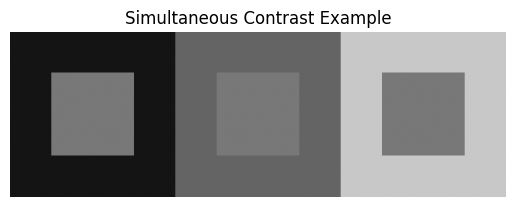

In [28]:
img = np.ones((200, 600)) * 100 # appear in gray not black
img[:, :200] = 20
img[:, 400:] = 200
img[50:150, 50:150] = 120
img[50:150, 250:350] = 120
img[50:150, 450:550] = 120

plt.imshow(img, cmap='gray',vmin=0 , vmax=255) #IMSHOW HAVE PROBLEM THAT SHOW the band in black , add vmin and vmax to look gray
plt.title("Simultaneous Contrast Example")
plt.axis('off')
plt.show()

##1. Does the central rectangle appear equally bright on both backgrounds?
It doesn't look equally bright on both backgrounds, on a black background it appears lighter, and on a white background it appears darker.
##2. What does this imply for interpreting pixel values visually?
This shows that the perception of brightness is not only dependent on the pixel value, but is also affected by the surrounding background.


##**3. Image representation as a matrix.**

**Exercise 3.1:** Inspecting image structure

In [29]:
image = np.random.randint(0, 256, (256, 256))
print(image.shape)
print(image.min(), image.max())

(256, 256)
0 255


##1. Explain how this array corresponds to f(x, y) as defined in the lecture.
The two-dimensional array represents the digital image where each element represents the illumination intensity value at the coordinates f(x, y).

The number of rows represents the vertical dimension (y), the number of columns represents the horizontal dimension (x), and the value of each element represents the gray level.


## **4. Sampling (Spatial Resolution)**
**Exercise 4.1:** Reducing the number of pixels in an image.

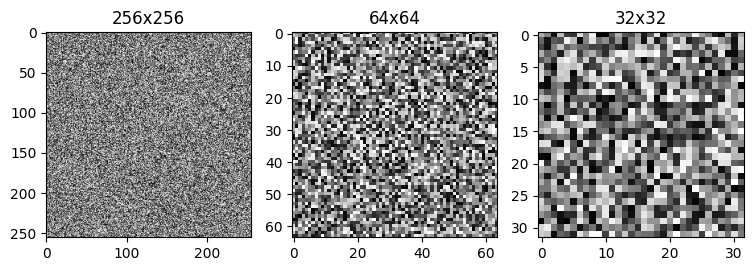

In [30]:
image = np.random.randint(0, 256, (256, 256))


down_64 = image[::4, ::4]
down_32 = image[::8, ::8]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("256x256")
plt.subplot(1,3,2); plt.imshow(down_64, cmap='gray'); plt.title("64x64")
plt.subplot(1,3,3); plt.imshow(down_32, cmap='gray'); plt.title("32x32")
plt.show()


##1. Which image shows the greatest loss of detail?
The 32x32 image shows the greatest loss of detail.
##2. Has the number of grey levels changed?
The number of gray levels did not change; the change was only in the number of pixels.


## **5. Quantisation (Intensity Resolution)**
**Exercise 5.1:** Reducing the number of grey levels.

[  0  16  32  48  64  80  96 112 128 144 160 176 192 208 224 240]


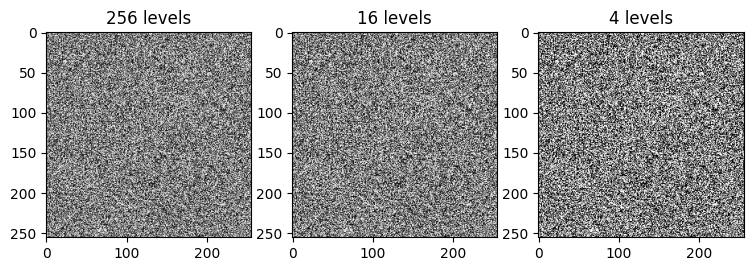

In [31]:
def quantise(img, levels):
 step = 256 // levels
 return (img // step) * step
q256 = quantise(image, 256)
q16 = quantise(image, 16)
q4 = quantise(image, 4)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(q256, cmap='gray')
plt.title("256 levels")
#plt.colorbar(fraction= )


plt.subplot(1,3,2)
plt.imshow(q16, cmap='gray')
plt.title("16 levels")

plt.subplot(1,3,3)
plt.imshow(q4, cmap='gray')
plt.title("4 levels")
print(np.unique(q16))
plt.show()

##1. At which level does banding become noticeable?
The banding becomes apparent at 4 gray levels.
##2. How does this relate to bits per pixel?
The fewer the bits per pixel, the fewer the intensity levels, resulting in a loss of smooth gradation and the appearance of choppyness.

## **6. Sampling vs quantisation**
##**Exercise 6.1:** Conceptual comparison

#Using your results from Exercises 4 and 5:

##• Identify which process affects spatial detail

SamplingIt affects spatial details (shape and edges).

##• Identify which process affects intensity smoothness

Quantisation It affects the smoothness of the color gradient and the brightness.


## **7. Pixel Neighbourhoods (Exercise 7)**
**Task:** Complete the code to define the 4-neighbors ($N_4$) and 8-neighbors ($N_8$) for point $p$.

In [32]:
p = image
x,y=(5,5)

# Student Task: Define the coordinates relative to p
N4 = [
    p[x-1, y],
    p[x+1, y],
    p[x, y-1],
    p[x, y+1]
]


N8 = N4 + [
    p[x-1, y-1],
    p[x-1, y+1],
    p[x+1, y-1],
    p[x+1, y+1]
]

print("Pixel value at p(x,y):", p[x, y])
print("\nLocal 5x5 neighbourhood around p:")
print(p[3:8, 3:8])

print("\nN4 Neighbourhood values:", N4)
print("N8 Neighbourhood values:", N8)

Pixel value at p(x,y): 185

Local 5x5 neighbourhood around p:
[[138 176 165  42 160]
 [225 175 153 190  48]
 [ 31 220 185 204  23]
 [  6 225 171 235 131]
 [115  29 124 175   3]]

N4 Neighbourhood values: [np.int64(153), np.int64(171), np.int64(220), np.int64(204)]
N8 Neighbourhood values: [np.int64(153), np.int64(171), np.int64(220), np.int64(204), np.int64(175), np.int64(190), np.int64(225), np.int64(235)]



##1. Why does 8 adjacency sometimes create ambiguity?
Because the country connection may link areas that should not be considered actually connected.

##2. When is m adjacency preferred?
When needed to avoid this ambiguity while maintaining the correct connection between pixels.


## **8. Distance Measures (Exercise 8)**
**Task:** Implement the formulas for Euclidean, City-block ($D_4$), and Chessboard ($D_8$) distances.

In [33]:
import math

p = (2, 3)
q = (7, 9)

# Student Task: Implement the formulas
D_euclid = math.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)

D4 = abs(p[0]-q[0])+abs(p[1]-q[1])

D8 = max(abs(p[0]-q[0]), abs(p[1]-q[1]))
print("Euclidean:" ,D_euclid)
print("City-block(D4):",D4)
print("Chessboard (D8):",D8)

Euclidean: 7.810249675906654
City-block(D4): 11
Chessboard (D8): 6


##1. Which distance corresponds to N4 adjacency?
D4 (Manhattan distance).
##2. Which corresponds to N8 adjacency?
D8 (Chessboard distance).

## **9. Geometric Transformations**
**Exercise 9.1 & 10.1:** Translation and Interpolation.

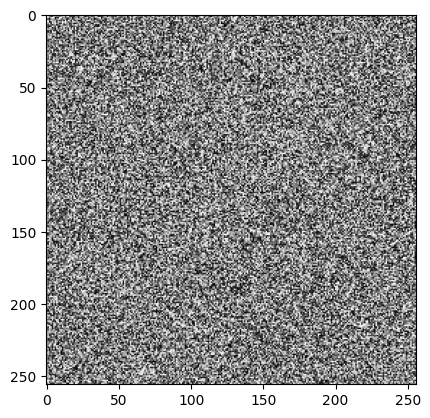

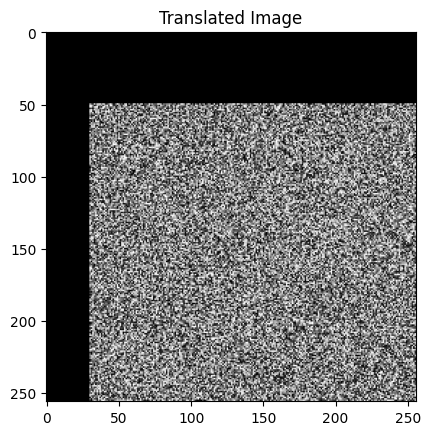

In [34]:
# jusr for expling the concept of tran
translated = np.zeros_like(image)
translated[50:, 30:] = image[:-50, :-30]
plt.imshow(image, cmap='gray')
plt.show()
plt.imshow(translated, cmap='gray')
plt.title("Translated Image")
plt.show()

## **10. Image scaling and interpolation**
**Exercise 10.1:** Nearest neighbour zoom

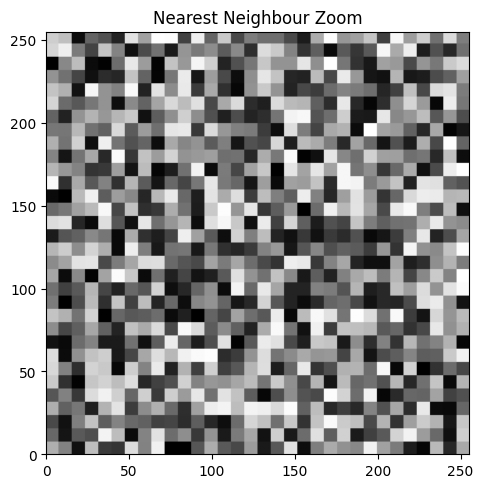

In [35]:
zoom = np.repeat(np.repeat(down_32, 8, axis=0), 8, axis=1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(down_32, cmap='gray')
plt.xlim(0,255)
plt.ylim(0,255)
plt.subplot(1,2,1)

plt.imshow(zoom, cmap='gray')
plt.title("Nearest Neighbour Zoom")
plt.show()

##1. Why does the image appear blocky?
Nearest Neighbour duplicates the same pixel value without calculating the average of neighboring values.

##2. Which interpolation method would improve smoothness?
Bilinear or Bicubic interpolation.

## **11. Reflection & Mini Project**
**Task:**

1.	Start with a grey scale image
2.	Create three versions with different spatial resolutions
3.	Create three versions with different intensity resolutions
4.	Comment on which degradation affects interpretability more and why

**Your explanation must reference:**


•	Sampling

•	Quantisation

•	Human visual perception
________________________________________
**Reflection questions**

1.	Why is a digital image always an approximation of reality?

2.	How does human perception complicate objective image analysis?

3.	Why is interpolation unavoidable in geometric transformations?

***Note:***

 Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots

## **11. Reflection & Mini Project**

 ## **11.1.Creating a grayscale image**

 We will start with a clear grayscale image (with gradients and shapes).


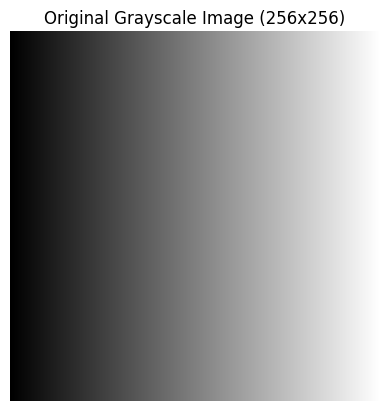

In [36]:
H, W = 256, 256
img = np.tile(np.linspace(0, 255, W, dtype=np.uint8), (H, 1))

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Grayscale Image (256x256)")
plt.axis('off')
plt.show()

## **11.2 Spatial Resolution (Sampling)**

## Reducing the number of pixels in an image.

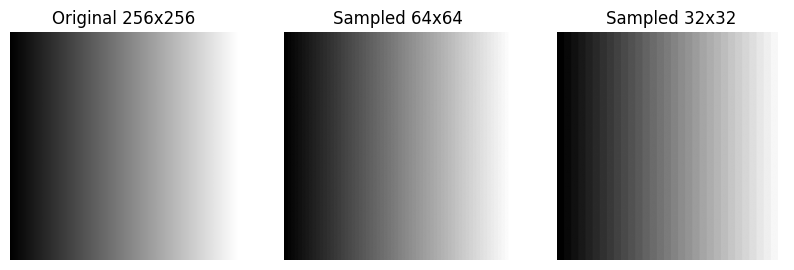

In [37]:
def downsample(img, step):
    return img[::step, ::step]

def upsample_nearest(img_small, factor):
    return np.repeat(np.repeat(img_small, factor, axis=0), factor, axis=1)


down_64 = downsample(img, 4)
down_32 = downsample(img, 8)


up_64 = upsample_nearest(down_64, 4)
up_32 = upsample_nearest(down_32, 8)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original 256x256"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(up_64, cmap='gray'); plt.title("Sampled 64x64"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(up_32, cmap='gray'); plt.title("Sampled 32x32"); plt.axis('off')
plt.show()


## **11.2 Intensity Resolution(Quantisatio)**
##Reducing the number of grey levels.

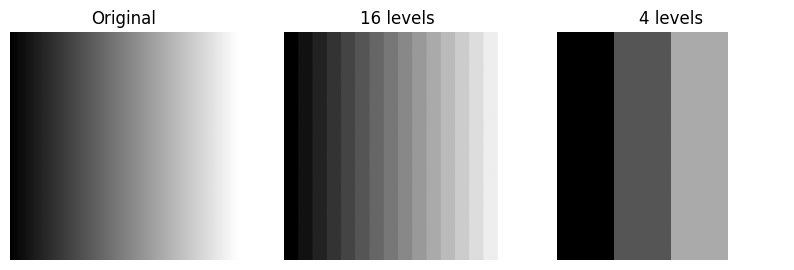

In [38]:
def quantise(img, levels):
    step = 256 // levels
    return (img // step) * step

q16 = quantise(img, 16)
q4  = quantise(img, 4)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(q16, cmap='gray'); plt.title("16 levels"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(q4, cmap='gray'); plt.title("4 levels"); plt.axis('off')
plt.show()


##**which degradation affects interpretability more and why?**


##Sampling degradation affects interpretability more than quantisation.
##Reducing spatial resolution removes important spatial details, making the image structure harder to understand.

##Quantisation mainly affects intensity smoothness, but the overall content of the image often remains interpretable to the human visual system.

##**Reflection questions**
##1. Why is a digital image always an approximation of reality?
A digital image represents the real world using a finite number of pixels and intensity levels, while reality is continuous. Therefore, some information is always lost during sampling and quantisation.
##2. How does human perception complicate objective image analysis?
Human perception is influenced by context, contrast, and surrounding regions, so the same pixel value can appear different to the human eye. This makes visual interpretation subjective and not purely based on numerical values.
##3. Why is interpolation unavoidable in geometric transformations?
Geometric transformations often map pixels to non-integer positions, so interpolation is required to estimate new pixel values and fill in missing information.